In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
mall_customer_info= pd.read_csv("/workspaces/codespaces-jupyter/data/Mall_Customers.csv")
mall_customer_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_annual_income = scalar.fit_transform(mall_customer_info['Annual Income (k$)'].values.reshape(-1,1))

In [5]:
mall_customer_info['Scaled_Annual_Income'] = scaled_annual_income

In [5]:
mall_customer_info.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_Income
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,100.500000,38.850000,60.560000,50.200000,-2.131628e-16
std,57.879185,13.969007,26.264721,25.823522,1.002509e+00
min,1.000000,18.000000,15.000000,1.000000,-1.738999e+00
25%,50.750000,28.750000,41.500000,34.750000,-7.275093e-01
50%,100.500000,36.000000,61.500000,50.000000,3.587926e-02
75%,150.250000,49.000000,78.000000,73.000000,6.656748e-01
max,200.000000,70.000000,137.000000,99.000000,2.917671e+00


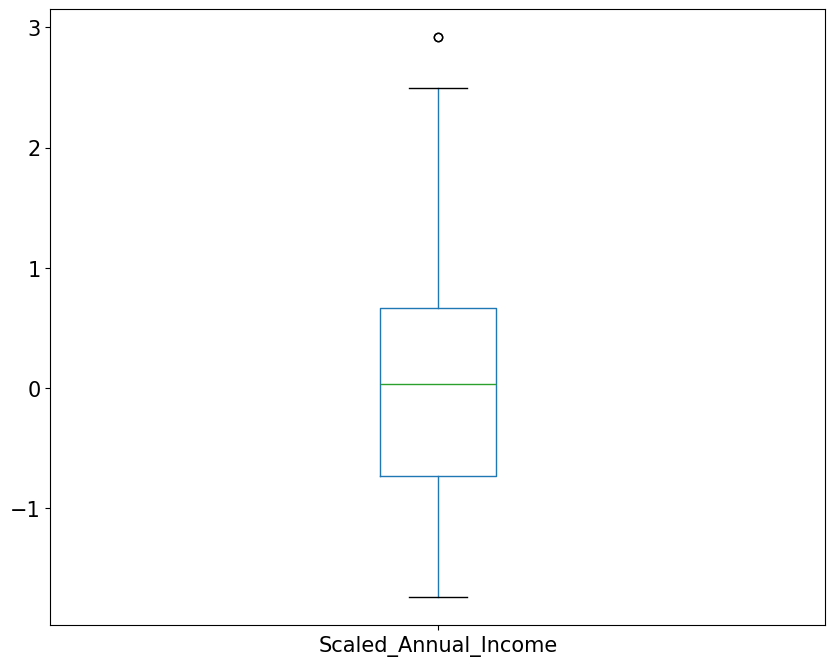

In [6]:
mall_customer_info.boxplot(figsize=(10,8),grid=False,fontsize=15,column=['Scaled_Annual_Income']);

In [6]:
outliers = np.where(mall_customer_info['Scaled_Annual_Income']>2.917671)

In [7]:
outliers

(array([198, 199]),)

In [8]:
mall_customer_info.iloc[outliers]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_Income
198,199,Male,32,137,18,2.917671
199,200,Male,30,137,83,2.917671


In [9]:
outliers_removed = mall_customer_info.drop(mall_customer_info.index[outliers])

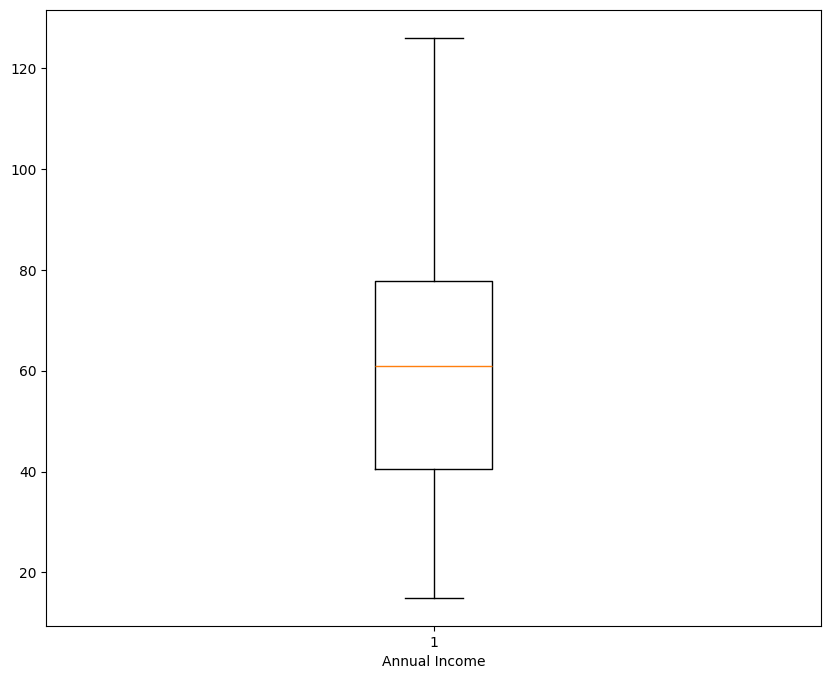

In [19]:
data = outliers_removed['Annual Income (k$)']
plt.figure(figsize=(10,8))
plt.grid(False)
plt.boxplot(data)
plt.xlabel('Annual Income')
plt.show()